In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('results.csv')

print(df.head())

         date home_team away_team  home_score  away_score tournament     city  \
0  1872-11-30  Scotland   England           0           0   Friendly  Glasgow   
1  1873-03-08   England  Scotland           4           2   Friendly   London   
2  1874-03-07  Scotland   England           2           1   Friendly  Glasgow   
3  1875-03-06   England  Scotland           2           2   Friendly   London   
4  1876-03-04  Scotland   England           3           0   Friendly  Glasgow   

    country  neutral  
0  Scotland    False  
1   England    False  
2  Scotland    False  
3   England    False  
4  Scotland    False  


In [2]:
df.describe()

,home_score,away_score
count,46442.000000,46442.000000
mean,1.752444,1.183519
std,1.765016,1.399127
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46442 entries, 0 to 46441
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        46442 non-null  object
 1   home_team   46442 non-null  object
 2   away_team   46442 non-null  object
 3   home_score  46442 non-null  int64 
 4   away_score  46442 non-null  int64 
 5   tournament  46442 non-null  object
 6   city        46442 non-null  object
 7   country     46442 non-null  object
 8   neutral     46442 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.9+ MB


In [4]:
df.dropna(inplace=True)

print("\nПропущенные значения после удаления строк с нулевыми значениями:")
print(df.isnull().sum())


Пропущенные значения после удаления строк с нулевыми значениями:
date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64


In [5]:
Q1 = df['home_score'].quantile(0.25)
Q3 = df['home_score'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['home_score'] >= lower_bound) & (df['home_score'] <= upper_bound)]

print("\nВыбросы после удаления:")
print(df[(df['home_score'] < lower_bound) | (df['home_score'] > upper_bound)]['home_score'])


Выбросы после удаления:
Series([], Name: home_score, dtype: int64)


In [6]:
home_wins = df[df['home_score'] > df['away_score']]['home_team'].value_counts()
away_wins = df[df['away_score'] > df['home_score']]['away_team'].value_counts()

team_results = home_wins.add(away_wins, fill_value=0).sort_values(ascending=False)

print("Самые успешные команды по количеству побед:")
print(team_results.head(10))

Самые успешные команды по количеству побед:
Brazil         519.0
England        491.0
Germany        451.0
Argentina      449.0
South Korea    433.0
Sweden         419.0
Mexico         393.0
Italy          385.0
Uruguay        367.0
France         367.0
Name: count, dtype: float64


In [7]:
home_wins_pct = (df[df['home_score'] > df['away_score']]['neutral'] == False).mean()
away_wins_pct = (df[df['away_score'] > df['home_score']]['neutral'] == True).mean()


print("Процент побед команд, игравших дома:", home_wins_pct * 100)
print("Процент побед команд, игравших на нейтральном поле:", away_wins_pct * 100)

Процент побед команд, игравших дома: 77.22960151802657
Процент побед команд, игравших на нейтральном поле: 30.633239350758213


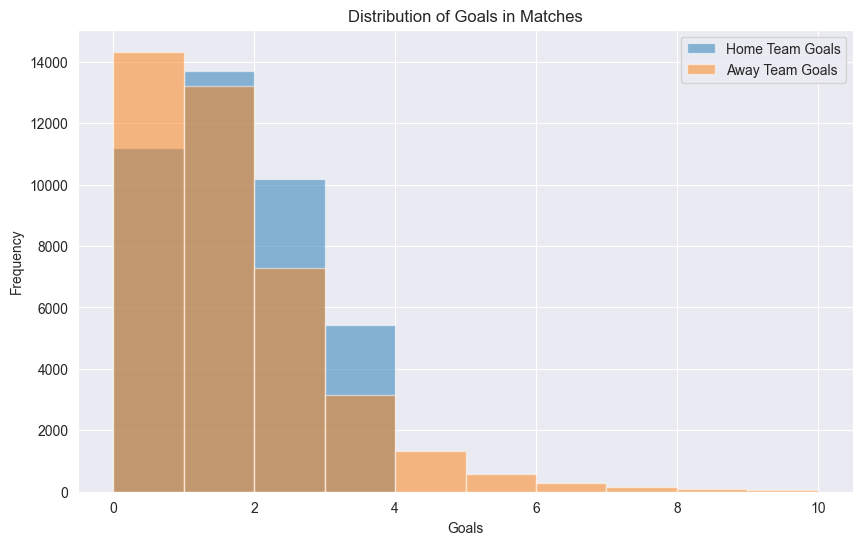

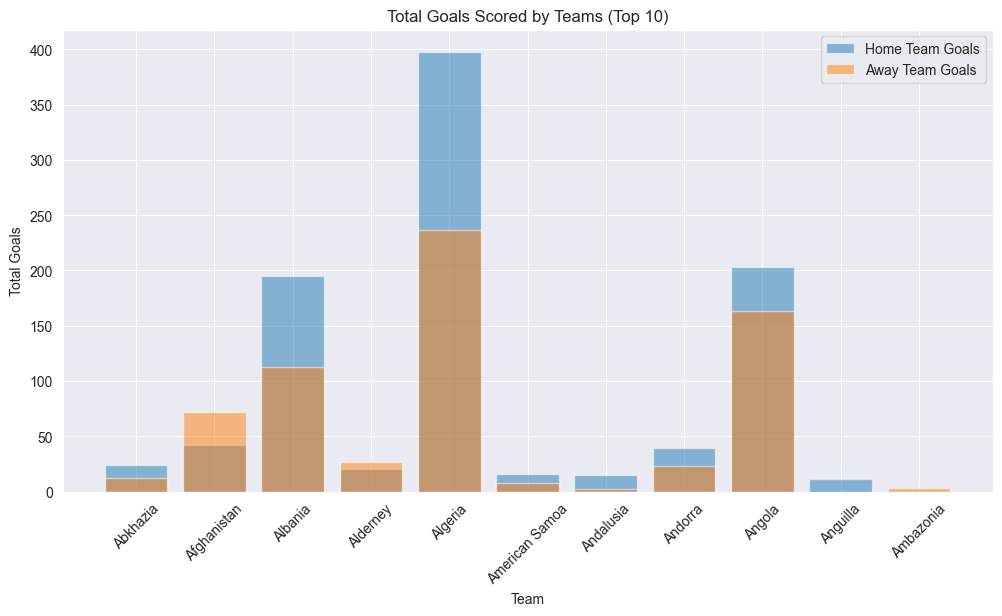

In [8]:
# Распределение забитых и пропущенных голов в матчах
plt.figure(figsize=(10, 6))
plt.hist(df['home_score'], bins=range(11), alpha=0.5, label='Home Team Goals')
plt.hist(df['away_score'], bins=range(11), alpha=0.5, label='Away Team Goals')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.title('Distribution of Goals in Matches')
plt.legend()
plt.show()


home_team_goals = df.groupby('home_team')['home_score'].sum()
away_team_goals = df.groupby('away_team')['away_score'].sum()

plt.figure(figsize=(12, 6))
plt.bar(home_team_goals.index[:10], home_team_goals.values[:10], alpha=0.5, label='Home Team Goals')
plt.bar(away_team_goals.index[:10], away_team_goals.values[:10], alpha=0.5, label='Away Team Goals')
plt.xlabel('Team')
plt.ylabel('Total Goals')
plt.title('Total Goals Scored by Teams (Top 10)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [9]:
tournament_counts = df['tournament'].value_counts()

print("Самые популярные турниры:")
print(tournament_counts.head(10))

Самые популярные турниры:
tournament
Friendly                                15854
FIFA World Cup qualification             6916
UEFA Euro qualification                  2478
African Cup of Nations qualification     1910
FIFA World Cup                            872
African Cup of Nations                    747
Copa América                              704
AFC Asian Cup qualification               599
CECAFA Cup                                575
CFU Caribbean Cup qualification           497
Name: count, dtype: int64


In [10]:
tournament_avg_goals = df.groupby('tournament')[['home_score', 'away_score']].mean().sum(axis=1)


print("Средний результат матчей в различных турнирах:")
print(tournament_avg_goals.sort_values(ascending=False).head(10))

Средний результат матчей в различных турнирах:
tournament
Évence Coppée Trophy                       6.000000
Tynwald Hill Tournament                    5.833333
East Asian Games                           5.666667
World Unity Cup                            5.333333
CONIFA World Football Cup qualification    5.250000
Pacific Games                              5.088235
South Pacific Games                        4.808511
Afro-Asian Games                           4.333333
Dragon Cup                                 4.000000
Bolivarian Games                           4.000000
dtype: float64


In [12]:
tournament_avg_goals_per_match = df.groupby('tournament')[['home_score', 'away_score']].mean().sum(axis=1)

unique_teams_per_tournament = df.groupby('tournament')[['home_team', 'away_team']].nunique().sum(axis=1)

draws_per_tournament = df[df['home_score'] == df['away_score']]['tournament'].value_counts()

tournament_stats = pd.DataFrame({
    'Matches': tournament_counts,
    'Average Goals per Match': tournament_avg_goals_per_match,
    'Unique Teams': unique_teams_per_tournament,
    'Draws': draws_per_tournament
})

print("Дополнительная информация о турнирах:")
print(tournament_stats.head(10))

Дополнительная информация о турнирах:
                                      Matches  Average Goals per Match  \
tournament                                                               
ABCS Tournament                            17                 3.235294   
AFC Asian Cup                             384                 2.408854   
AFC Asian Cup qualification               599                 2.514190   
AFC Challenge Cup                          92                 2.391304   
AFC Challenge Cup qualification            76                 2.500000   
AFF Championship                          191                 2.712042   
AFF Championship qualification             52                 3.000000   
Africa Cup of Nations qualification        52                 2.230769   
African Cup of Nations                    747                 2.187416   
African Cup of Nations qualification     1910                 2.114136   

                                      Unique Teams  Draws  
tournament   

In [13]:
home_wins_by_country = df[df['home_score'] > df['away_score']]['country'].value_counts()
away_wins_by_country = df[df['away_score'] > df['home_score']]['country'].value_counts()

country_results = home_wins_by_country.add(away_wins_by_country, fill_value=0).sort_values(ascending=False)

print("Страны с самыми успешными командами по количеству побед:")
print(country_results.head(10))

Страны с самыми успешными командами по количеству побед:
country
United States           897.0
France                  549.0
Malaysia                500.0
Qatar                   473.0
Thailand                466.0
England                 430.0
Sweden                  385.0
United Arab Emirates    380.0
Germany                 359.0
Brazil                  354.0
Name: count, dtype: float64


In [14]:
goals_by_city = df.groupby(['city', 'country'])[['home_score', 'away_score']].mean().sum(axis=1)

print("Средний результат матчей в разных городах и странах:")
print(goals_by_city.sort_values(ascending=False).head(10))

Средний результат матчей в разных городах и странах:
city           country      
Tenero-Contra  Switzerland      9.000000
Nakagusuku     Japan            9.000000
Long Beach     United States    9.000000
Lublin         Poland           8.000000
Lleida         Spain            8.000000
Antibes        France           8.000000
Lugo           Spain            8.000000
Koror          Palau            7.666667
Blantyre       Nyasaland        7.333333
Oakfield       England          7.000000
dtype: float64


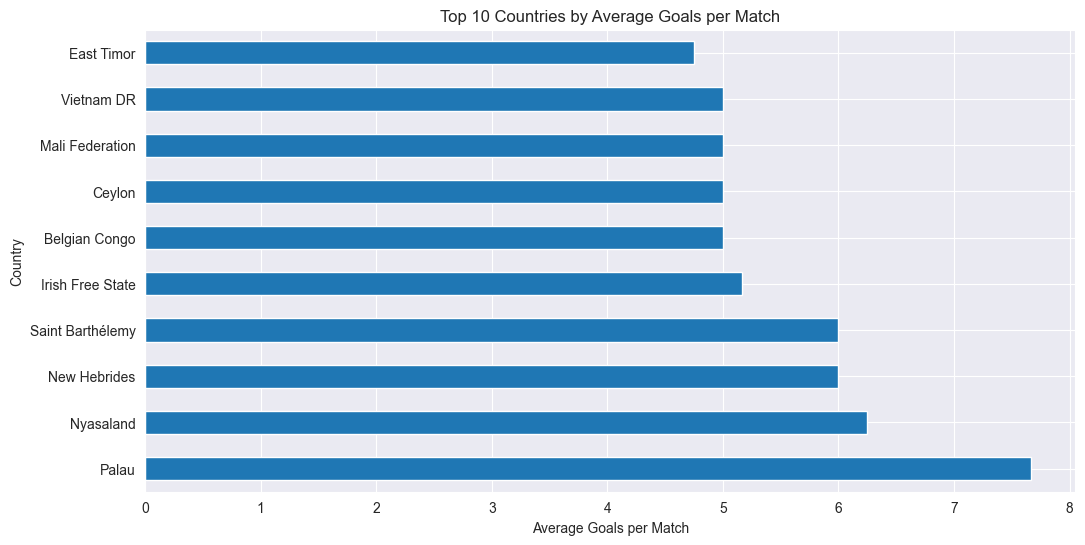

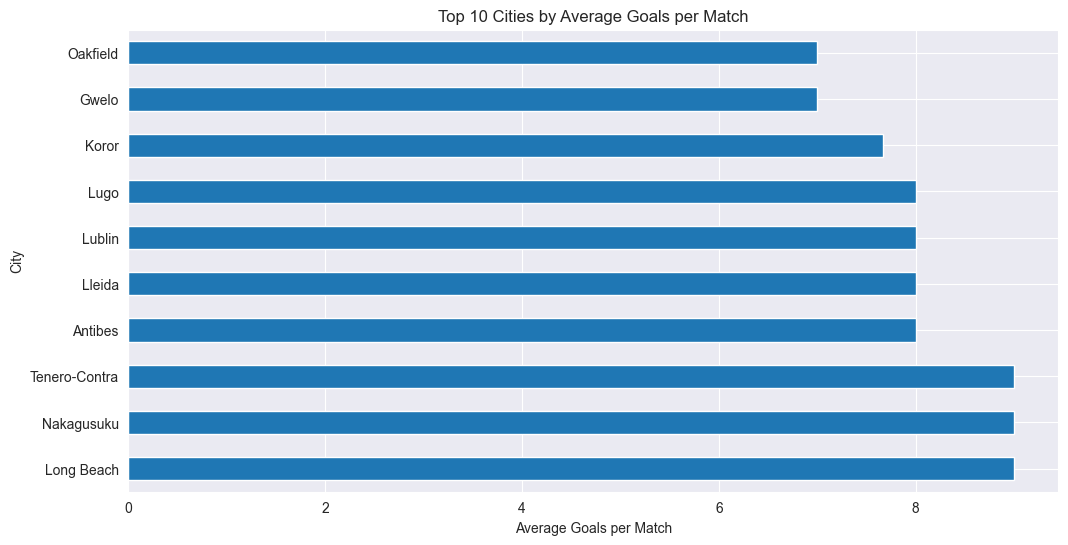

In [15]:
top_countries = df.groupby('country')[['home_score', 'away_score']].mean().sum(axis=1).nlargest(10)
top_cities = df.groupby('city')[['home_score', 'away_score']].mean().sum(axis=1).nlargest(10)

plt.figure(figsize=(12, 6))
top_countries.plot(kind='barh')
plt.xlabel('Average Goals per Match')
plt.ylabel('Country')
plt.title('Top 10 Countries by Average Goals per Match')
plt.show()

plt.figure(figsize=(12, 6))
top_cities.plot(kind='barh')
plt.xlabel('Average Goals per Match')
plt.ylabel('City')
plt.title('Top 10 Cities by Average Goals per Match')
plt.show()

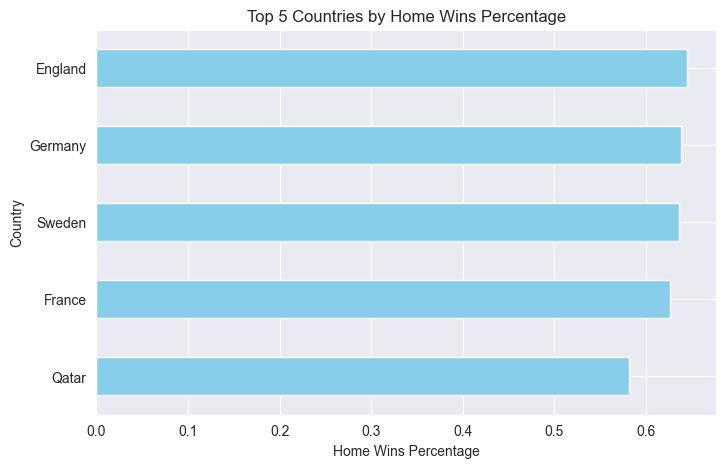

In [16]:
top_countries = df['country'].value_counts().nlargest(10).index


home_wins_pct_by_country = (df[df['home_score'] > df['away_score'] & df['country'].isin(top_countries)]
                            .groupby('country')['home_score'].count() /
                            df[df['country'].isin(top_countries)].groupby('country')['home_score'].count())


top_countries_home_wins = home_wins_pct_by_country.nlargest(5)

plt.figure(figsize=(8, 5))
top_countries_home_wins.sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('Home Wins Percentage')
plt.ylabel('Country')
plt.title('Top 5 Countries by Home Wins Percentage')
plt.show()

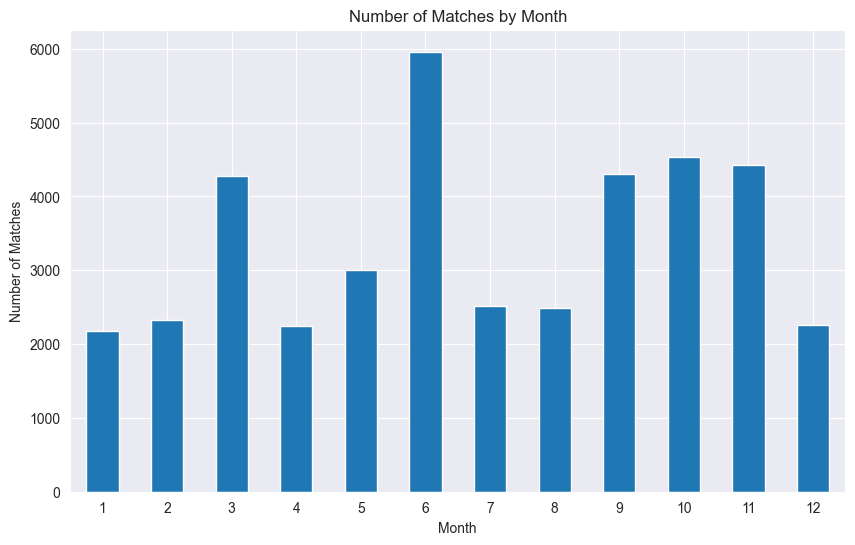

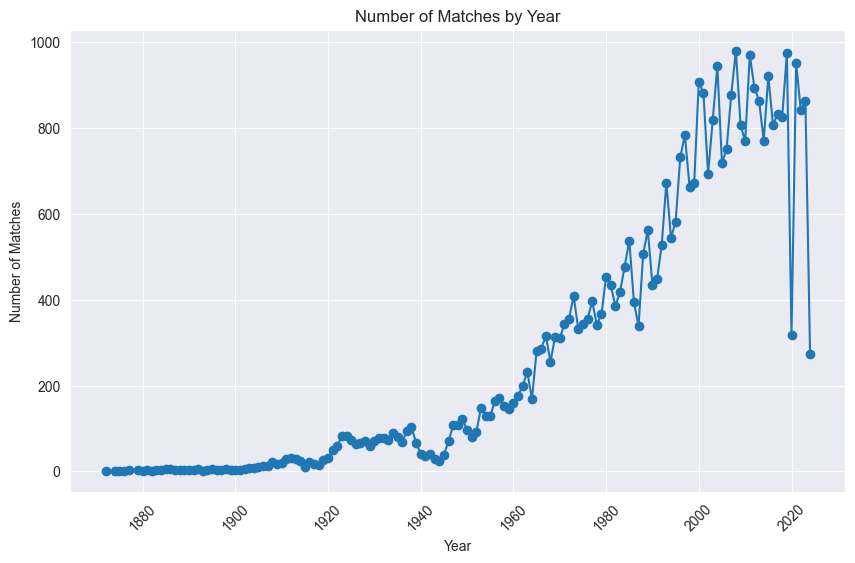

In [17]:
df['month'] = pd.to_datetime(df['date']).dt.month
df['year'] = pd.to_datetime(df['date']).dt.year

matches_by_month = df.groupby('month')['home_score'].count()
matches_by_year = df.groupby('year')['home_score'].count()

plt.figure(figsize=(10, 6))
matches_by_month.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of Matches')
plt.title('Number of Matches by Month')
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(10, 6))
matches_by_year.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.title('Number of Matches by Year')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

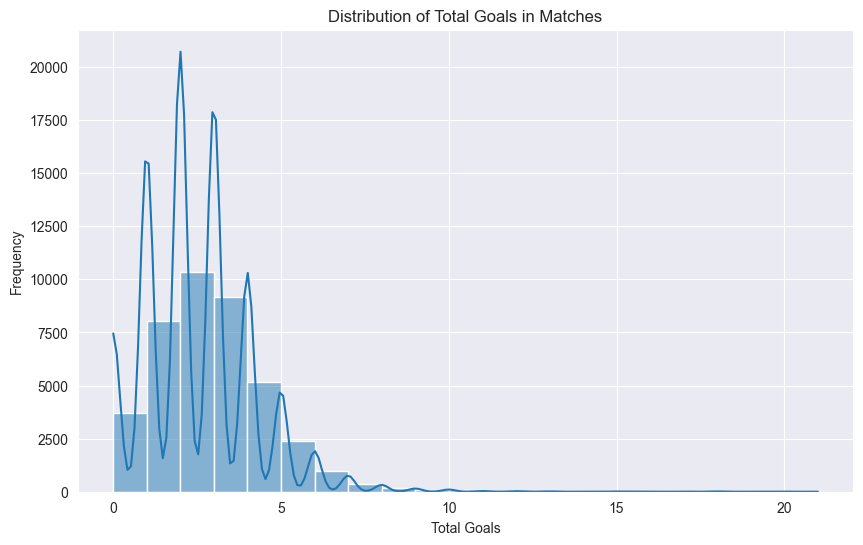

In [18]:
total_goals = df['home_score'] + df['away_score']

plt.figure(figsize=(10, 6))
sns.histplot(total_goals, bins=range(12), kde=True)
plt.xlabel('Total Goals')
plt.ylabel('Frequency')
plt.title('Distribution of Total Goals in Matches')
plt.grid(True)
plt.show()

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv('results.csv')


X = df[['home_team', 'away_team']]
y_home = df['home_score']
y_away = df['away_score']


X = pd.get_dummies(X, columns=['home_team', 'away_team'])


X_train, X_test, y_train_home, y_test_home, y_train_away, y_test_away = train_test_split(X, y_home, y_away, test_size=0.2, random_state=42)


model_home = RandomForestRegressor(n_estimators=100, random_state=42)
model_home.fit(X_train, y_train_home)

model_away = RandomForestRegressor(n_estimators=100, random_state=42)
model_away.fit(X_train, y_train_away)


def predict_scores(home_team, away_team):
    def get_match_statistics(home_team, away_team):
        matches = df[((df['home_team'] == home_team) & (df['away_team'] == away_team)) | ((df['home_team'] == away_team) & (df['away_team'] == home_team))]

        if len(matches) == 0:
            home_team_stats = df[df['home_team'] == home_team]
            away_team_stats = df[df['home_team'] == away_team]
            return home_team_stats, away_team_stats

        match_stats = {
            'total_matches': len(matches),
            'home_team_wins': len(matches[matches['home_team'] == home_team]),
            'away_team_wins': len(matches[matches['home_team'] == away_team]),
            'draws': len(matches[(matches['home_score'] == matches['away_score'])]),
            'total_goals': matches['home_score'].sum() + matches['away_score'].sum(),
            'average_goals_per_match': (matches['home_score'].sum() + matches['away_score'].sum()) / len(matches)
        }

        return match_stats

    def visualize_statistics(home_team, away_team):
        match_stats = get_match_statistics(home_team, away_team)

        plt.figure(figsize=(10, 6))
        sns.barplot(x=['Home Team Wins', 'Away Team Wins', 'Draws'], y=[match_stats['home_team_wins'], match_stats['away_team_wins'], match_stats['draws']])
        plt.title('Match Outcomes')
        plt.xlabel('Outcome')
        plt.ylabel('Number of Matches')
        plt.show()

        print("Total Matches:", match_stats['total_matches'])
        print("Total Goals:", match_stats['total_goals'])
        print("Average Goals per Match:", match_stats['average_goals_per_match'])

    input_data = pd.DataFrame([[0] * len(X.columns)], columns=X.columns)
    input_data['home_team_' + home_team] = 1
    input_data['away_team_' + away_team] = 1

    predicted_home_score = round(model_home.predict(input_data)[0])
    predicted_away_score = round(model_away.predict(input_data)[0])

    visualize_statistics(home_team, away_team)

    return predicted_home_score, predicted_away_score

home_team = "France"
away_team = "England"
predicted_home_score, predicted_away_score = predict_scores(home_team, away_team)
print(f"Predicted score between {home_team} and {away_team}: {predicted_home_score} - {predicted_away_score}")

KeyboardInterrupt: 

In [ ]:
def match(home_team, away_team):
    predicted_home_score, predicted_away_score = predict_scores(home_team, away_team)
    print(f"Predicted score between {home_team} and {away_team}: {predicted_home_score} - {predicted_away_score}")

In [ ]:
match('Brazil', 'Argentina')

In [ ]:
match("Argentina", 'Brazil')

In [ ]:
match("Kyrgyzstan", "Uzbekistan")

In [ ]:
match("Uzbekistan", "Kyrgyzstan")
